# **Monte Carlo Simulation** 

## Question 7.1 - Buffon's Needle Method (Area Estimation)

### Integral Estimation

In [8]:
# we want to calculate I=∫²₀(x³−5x)dx using this method:
import numpy as np

# the x interval:(a,b) 
a=0 
b=2 
# the y interval:(0,ym)
ym=11 
N=10000 #number of the points taken


# we split the f(x)=(x³−5x) into two part : f1= x³ & f2= −5x 

# the 1st part of the f(x): f1= x³
Ns=0
for i in range (N):
    #choosing points randomly in the intervals
    x= np.random.randint(a,b)+np.random.rand() #np.random.randint is for having a integer between 0-2 & np.random.rand() is for making the decimal part
    y= np.random.randint(0,ym)+np.random.rand()
 
    f1= x**3
    if y < f1:
        Ns+=1
I1=ym*(b-a)*(Ns/N) #the amount of the integral

# the 2nd part of the f(x): f2= −5x 
Ns=0
for i in range (N):
    #choosing points randomly in the intervals
    x= np.random.randint(a,b)+np.random.rand() #np.random.randint is for having a integer between 0-2 & np.random.rand() is for making the decimal part
    y= np.random.randint(0,ym)+np.random.rand()

    f2= 5*x 
    if y < f2:
        Ns+=1
I2=ym*(b-a)*(Ns/N) #the amount of the integral


I= I1-I2
print("Integral Stimated Vaule = ",I)
#now for calculating the error of the stimated value 
realvalue=-6
error= abs(I-realvalue)/abs(realvalue)
print("Error = ",error)

Integral Stimated Vaule =  -5.9642
Error =  0.005966666666666676


### plotting the Error based on the points

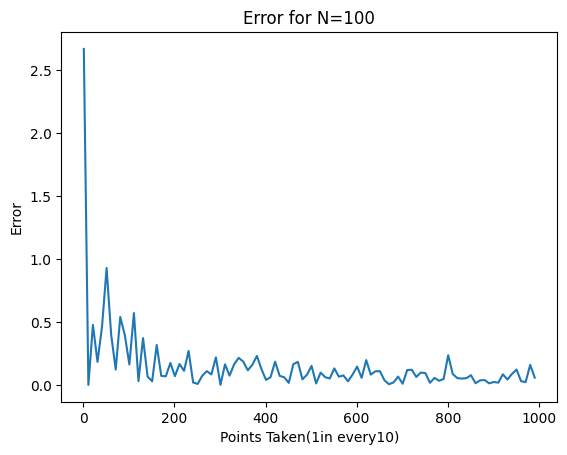

In [9]:

import numpy as np
import matplotlib.pyplot as plt

# the x interval:(a,b) 
a=0 
b=2 
# the y interval:(0,ym)
ym=11 
N=1000
realvalue=-6

errorlist=[]
step=[]


# we split the f(x)=(x³−5x) into two part : f1= x³ & f2= −5x 
for j in range(1,N,10): #getting every 10 of 1-N of j
    # the 1st part of the f(x): f1= x³
    Ns=0
    for i in range (j):
        x= np.random.randint(a,b)+np.random.rand() 
        y= np.random.randint(0,ym)+np.random.rand()
    
        f1= x**3
        if y < f1:
            Ns+=1
    I1=ym*(b-a)*(Ns/j) 

    # the 2nd part of the f(x): f2= −5x 
    Ns=0
    for i in range (j):
        x= np.random.randint(a,b)+np.random.rand() 
        y= np.random.randint(0,ym)+np.random.rand()

        f2= 5*x 
        if y < f2:
            Ns+=1
    I2=ym*(b-a)*(Ns/j) 
    I= I1-I2
    #making and appending the error each time the I is made
    error= abs(I-realvalue)/abs(realvalue)
    errorlist.append(error)
    step.append(j)

plt.plot(step,errorlist)
plt.xlabel("Points Taken(1in every10)")
plt.ylabel("Error")
plt.title("Error for N=100")
plt.show()


## Question 7.2 - Simple & Smart Sampling

### 1. Simple Sampling

In [10]:
# we want to calculate I=∫²₀(e^(-x²))dx using two method: 1.Simple Sampling & 2.Smart Sampling
# 1.Simple Sampling:  I = (b-a)<f> ; <f>= 1/n ∑^n_(i=1) f(xi)
import numpy as np
import time
starttime=time.time()

# the x interval:(a,b) 
a=0 
b=2 
N=10000
f=0
f2=0

#the sigma part of the <f>:
for i in range(1,N,1):
    x= np.random.randint(a,b)+np.random.rand() #np.random.randint is for having a integer between 0-2 & np.random.rand() is for making the decimal part
    #the f(xi)
    f+=np.e**(-x**2)
    f2+= (np.e**(-x**2))**2
avgf= f/N #<f>

#estimated value of the integral
I=(b-a)*avgf
print("Estimated Value(Simple Sampling)= ",I)

#real value of the integral
realvalue=0.8820813907624217
print("Real Value = ",realvalue)

print()

#real error
realerror= abs(I-realvalue)/abs(realvalue)
print("Real Error = ",realerror)

# Analytic Error
analyticerror = np.sqrt(abs(f2/N-avgf**2))/np.sqrt(N) #error= 𝜎/sqrt(N)
print("Analytic Error = ",analyticerror)

print()

#Run Time:
endtime=time.time()
print("Run Time = ",endtime-starttime)

Estimated Value(Simple Sampling)=  0.8866441955276512
Real Value =  0.8820813907624216

Real Error =  0.005172770691019442
Analytic Error =  0.0034523046163214255

Run Time =  0.0854647159576416


### 2. Smart Sampling

In [11]:
# we want to calculate I=∫²₀(e^(-x²))dx using two method: 1.Simple Sampling & 2.Smart Sampling
# 2.Smart Sampling:   I = (∫g(x)dx(-∞ -> ∞))<f/g>_(g(x)) ; <f/g>_(g(x)) = 1/n ∑^n_(i=1) (f(xi)/ g(xi))
import numpy as np
import time
starttime=time.time()

# the x interval:(a,b) 
a=0 
b=2 

N=10000
fg=0
fg2=0


#the sigma part of the <f>:
for i in range(N):
    #x should be choosen from the G ditribution = (e^(-x)) so x= ln(G)
    x=-np.log(np.random.randint(a,b)+np.random.rand()) #np.random.randint is for having a integer between 0-2 & np.random.rand() is for making the decimal part
    fg+=np.e**(-x**2+x) #the f(xi)/g(xi)
    fg2+= (np.e**(-x**2+x))**2

avgfg= (fg)/N #<f/g>_(g(x))


#estimated value of the integral
integralg=1 #∫g(x)dx(-∞ -> ∞)=∫e^(-x)dx(-∞ -> ∞)
I=integralg*avgfg
print("Estimated Value(Smart Sampling)= ",I)

#real value of the integral
realvalue=0.8820813907624217
print("Real Value = ",realvalue)

print()

#real error
realerror= abs(I-realvalue)/abs(realvalue)
print("Real Error = ",realerror)

# Analytic Error
analyticerror = np.sqrt(abs(fg2/N-avgfg**2))/np.sqrt(N) #error= 𝜎/sqrt(N)
print("Analytic Error = ",analyticerror)

print()

#Run Time:
endtime=time.time()
print("Run Time = ",endtime-starttime)

Estimated Value(Smart Sampling)=  0.74473712179453
Real Value =  0.8820813907624216

Real Error =  0.15570475741380166
Analytic Error =  0.0037517376634251753

Run Time =  0.1264810562133789


## Question 7.3 - Multiple Integral (Finding the center of mass of a sphere)

In [12]:
# we want to calculate the center of the mass of a sphere that from up to down the mass is reduced linearly (SO ρ(x)=ax+b) using Simple Sampling
# also the least densest point is 1/2 of the most densest point : m= ρ(R)/ρ(-R)=2 -> m= (aR+b)/(-aR+b)=2 -> a=1 , b=3R

# 1.Simple Sampling:  I = (b-a)<f> ; <f>= 1/n ∑^n_(i=1) f(xi)
import numpy as np

R=2 #radius
# the x interval:(a,b) 
c=-R
d=R 


#MASS
N=10000
f=0
for i in range(1,N,1):
    z= np.random.randint(c,d)+np.random.rand() #np.random.randint is for having a integer between 0-2 & np.random.rand() is for making the decimal part
    #the f(xi)
    f+=z+3*R #ρ(z)
avgf= f/N  #<f>

#estimated value of the integral
I=(c-d)*avgf  # Mz=∫ρ(z)dz

Mx = 2*R #∫dx 
My = 2*R #∫dy
Mz=I #Mont Carlo : ∫ρ(z)dz
M=Mx*My*Mz
print("Mass = ", abs(M))



print()

# Coordinate Of the CM:
f=0
for i in range(1,N,1):
    z= np.random.randint(c,d)+np.random.rand() #np.random.randint is for having a integer between 0-2 & np.random.rand() is for making the decimal part
    #the f(xi)
    f+=z**2+3*R*z #zρ(z)
avgf= f/N  #<f>

#estimated value of the integral
I=(c-d)*avgf  # cz= ∫zρ(z)dz

cx=0 #(because of the symmetry)
cy=0 #(because of the symmetry)
cz= I/M #Mont Carlo : cz= 1/M (∫zρ(z)dz) 
print("Coordinates of the COM = ", [cx,cy,cz])



Mass =  384.4601348486492

Coordinates of the COM =  [0, 0, 0.014494217364800829]
